In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [13]:

dateparse = lambda x: np.NaN if x == 'nan' else pd.datetime.strptime(x, '%H:%M')
fatal_accidents = pd.read_csv("input_data/accidents_2012_to_2014.csv", parse_dates=['Time'], date_parser=dateparse)
print("The number of rows in the dataset", fatal_accidents.shape)


#  Dropping the attributes I wont need
fatal_accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location',
                'Longitude', 'Latitude', 'Police_Force', 'Accident_Index', '2nd_Road_Number',
                'Number_of_Casualties', 'Date', 'Local_Authority_(District)', '1st_Road_Number',
                'Local_Authority_(Highway)', 'Junction_Detail', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
               axis=1, inplace=True)

#fatal_accidents = accidents#[accidents['Accident_Severity'] == 1]
#fatal_accidents.drop(['Accident_Severity'], axis=1, inplace=True)
#del accidents



The number of rows in the dataset (464697, 33)


In [14]:
#print("The number of fatal accidents", fatal_accidents.shape)
for col in fatal_accidents:
    print(col, np.sum(fatal_accidents[col] == -1))
    #fatal_accidents = fatal_accidents[fatal_accidents[col] != -1]

print("Printing null values in the data\n", fatal_accidents.isnull().sum())
print("The number of row without missing values\n", fatal_accidents.shape)


Accident_Severity 0
Number_of_Vehicles 0
Day_of_Week 0
Time 0
1st_Road_Class 0
Road_Type 0
Speed_limit 0
Junction_Control 0
2nd_Road_Class 181794
Pedestrian_Crossing-Human_Control 0
Pedestrian_Crossing-Physical_Facilities 0
Light_Conditions 0
Weather_Conditions 0
Road_Surface_Conditions 0
Special_Conditions_at_Site 0
Carriageway_Hazards 0
Urban_or_Rural_Area 0
Printing null values in the data
 Accident_Severity                               0
Number_of_Vehicles                              0
Day_of_Week                                     0
Time                                           13
1st_Road_Class                                  0
Road_Type                                       0
Speed_limit                                     0
Junction_Control                           178610
2nd_Road_Class                                  0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Light_Conditions                                0
Wea

In [15]:

fatal_accidents.fillna(value={'Junction_Control': 'Unknown'}, inplace=True)
fatal_accidents.dropna(inplace=True)
print("Printing null values in the data after removing Nan values\n", fatal_accidents.isnull().sum())
print(fatal_accidents.shape)

#fatal_accidents['Junction_Detail'] = fatal_accidents['Junction_Detail'].astype('category')
#fatal_accidents['Junction_Detail'].value_counts().plot(kind='bar')
#fatal_accidents['Junction_Detail'].value_counts().plot(kind='bar')
#plt.show()


Printing null values in the data after removing Nan values
 Accident_Severity                          0
Number_of_Vehicles                         0
Day_of_Week                                0
Time                                       0
1st_Road_Class                             0
Road_Type                                  0
Speed_limit                                0
Junction_Control                           0
2nd_Road_Class                             0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
Urban_or_Rural_Area                        0
dtype: int64
(463927, 17)


In [16]:
rc = np.asarray(["_", 'Motorway', 'A(M)', 'A', 'B', 'C', 'Unclassified'])
t = rc[fatal_accidents['1st_Road_Class'].values.astype('int32')]
#fatal_accidents['2nd_Road_Class'] = fatal_accidents['2nd_Road_Class'].astype('category')
print(set(t))

{'Motorway', 'C', 'Unclassified', 'A', 'A(M)', 'B'}


In [4]:


#Drop null values

#fatal_accidents.drop(['Time'], axis=1, inplace=True)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(fatal_accidents.describe(include='all'))


Printing null values in the data after removing Nan values
 Accident_Severity                          0
Number_of_Vehicles                         0
Day_of_Week                                0
Time                                       0
1st_Road_Class                             0
Road_Type                                  0
Speed_limit                                0
Junction_Control                           0
2nd_Road_Class                             0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
Urban_or_Rural_Area                        0
dtype: int64
        Accident_Severity  Number_of_Vehicles    Day_of_Week  \
count       282293.000000       282293.000000  282293.000000   
unique                NaN         

In [17]:

fatal_accidents['Urban_or_Rural_Area'] = fatal_accidents['Urban_or_Rural_Area'].astype('category')
rc = np.asarray(["_", 'Motorway', 'A(M)', 'A', 'B', 'C', 'Unclassified'])

fatal_accidents['1st_Road_Class'] = rc[fatal_accidents['1st_Road_Class'].values.astype('int32')]
fatal_accidents['1st_Road_Class'] = fatal_accidents['1st_Road_Class'].astype('category')

fatal_accidents['2nd_Road_Class'] = rc[fatal_accidents['2nd_Road_Class'].values.astype('int32')]
fatal_accidents['2nd_Road_Class'] = fatal_accidents['2nd_Road_Class'].astype('category')


fatal_accidents['Speed_limit'] = pd.cut(fatal_accidents['Speed_limit'].values,
                                               [0, 33, 55, 100], labels=['Less than 30',
                                               'From 40 to 50', 'More than 50'])

fatal_accidents['Speed_limit'] = fatal_accidents['Speed_limit'].astype('category')


#fatal_accidents['Number_of_Vehicles'] = fatal_accidents['Number_of_Vehicles'].astype('category')
fatal_accidents['Number_of_Vehicles'] = pd.cut(fatal_accidents['Number_of_Vehicles'].values,
                                               [0,1.5, 2.5, 3.5, 100], labels=['1 Vehicle',
                                               '2 Vehicle', '3 Vehicle', 'More than 3'])
fatal_accidents['Number_of_Vehicles'] = fatal_accidents['Number_of_Vehicles'].astype('category')

dw = np.asarray(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fatal_accidents['Day_of_Week'] = pd.cut(fatal_accidents['Day_of_Week'].values.astype('int32'), 
                                        [0,1,2,3,4,5,6,7], labels=dw, include_lowest=True)
fatal_accidents['Day_of_Week'] = fatal_accidents['Day_of_Week'].astype('category')

urb = np.asarray(['_', 'Urban Area', 'Rural Area'])
fatal_accidents['Urban_or_Rural_Area'] = urb[fatal_accidents['Urban_or_Rural_Area']]
fatal_accidents['Urban_or_Rural_Area'] = fatal_accidents['Urban_or_Rural_Area'].astype('category')
fatal_accidents['Accident_Severity'] = fatal_accidents['Accident_Severity'].astype('category')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fatal_accidents.describe(include='all'))

fatal_accidents.reset_index(drop=True, inplace=True)


        Accident_Severity Number_of_Vehicles Day_of_Week                 Time  \
count            463927.0             463927      463927               463927   
unique                3.0                  4           7                 1439   
top                   3.0          2 Vehicle    Saturday  1900-01-01 17:00:00   
freq             391941.0             278341       75921                 4597   
first                 NaN                NaN         NaN  1900-01-01 00:01:00   
last                  NaN                NaN         NaN  1900-01-01 23:59:00   

       1st_Road_Class           Road_Type   Speed_limit  \
count          463927              463927        463927   
unique              6                   6             3   
top                 A  Single carriageway  Less than 30   
freq           215952              350667        313344   
first             NaN                 NaN           NaN   
last              NaN                 NaN           NaN   

               Jun

In [18]:
from prometheus_client import values
date_time = pd.to_datetime(fatal_accidents['Time'])
hours = []
for t in date_time:
    hours.append(t.hour)

date_time = pd.Series(data=hours)
print(date_time.head(15))
date_time = pd.cut(date_time, [0, 5.9, 11.9, 17.9, 23.9], labels=['early_morning', 
                                              'morning', 'afternoon', 'evening'],
       include_lowest=True)
print(date_time.head(15))


0     20
1     17
2     10
3     12
4     20
5      7
6     14
7     11
8     13
9     19
10    17
11     5
12     8
13    17
14    18
dtype: int64
0           evening
1         afternoon
2           morning
3         afternoon
4           evening
5           morning
6         afternoon
7           morning
8         afternoon
9           evening
10        afternoon
11    early_morning
12          morning
13        afternoon
14          evening
dtype: category
Categories (4, object): [early_morning < morning < afternoon < evening]


In [19]:

fatal_accidents['Time'] = date_time


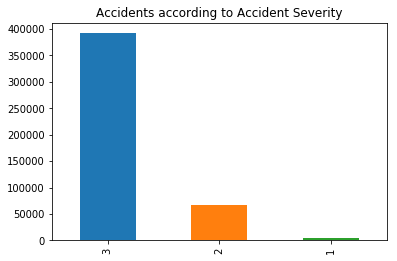

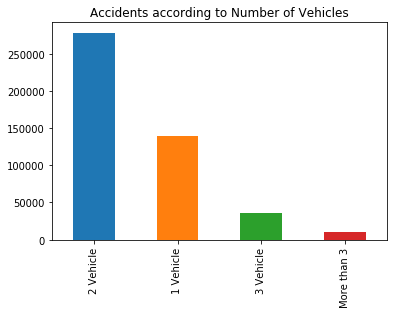

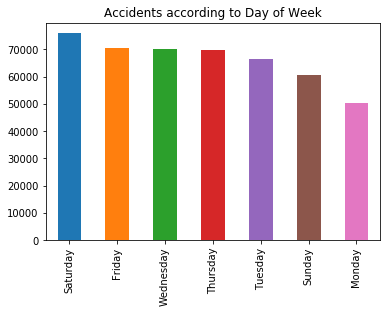

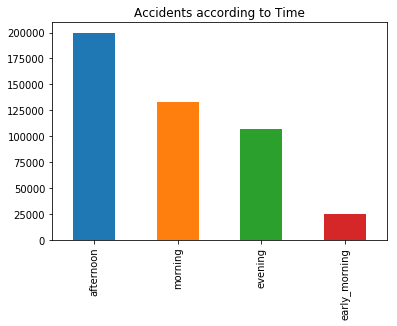

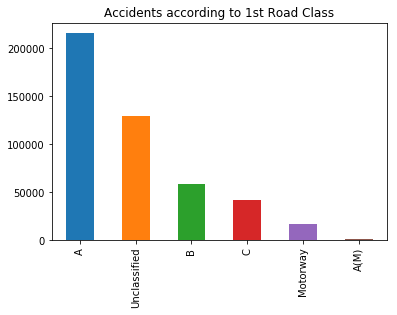

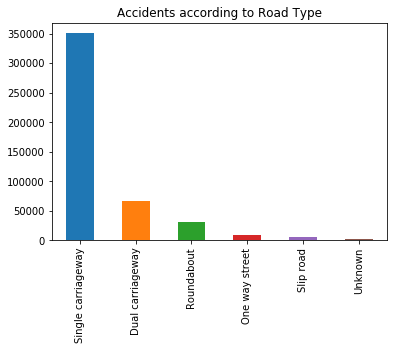

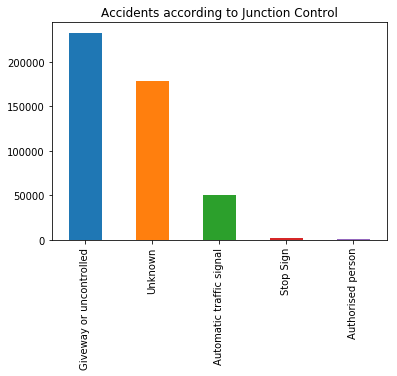

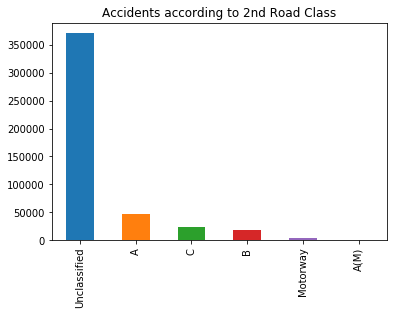

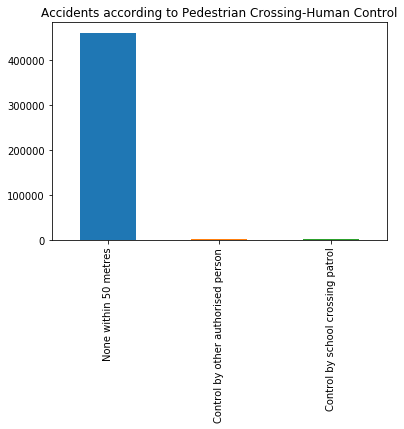

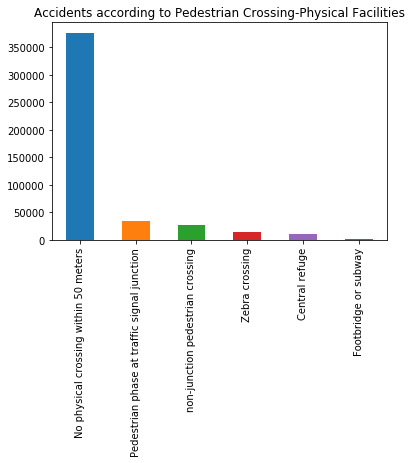

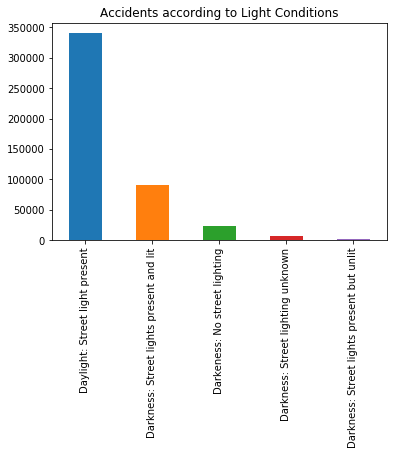

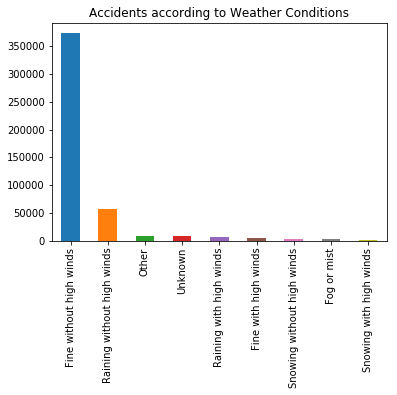

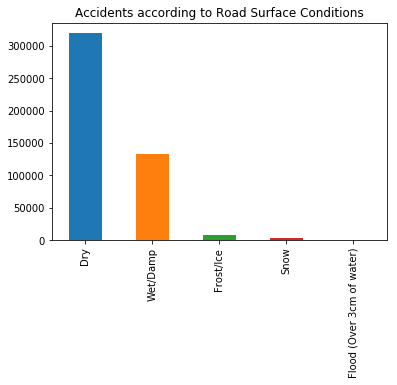

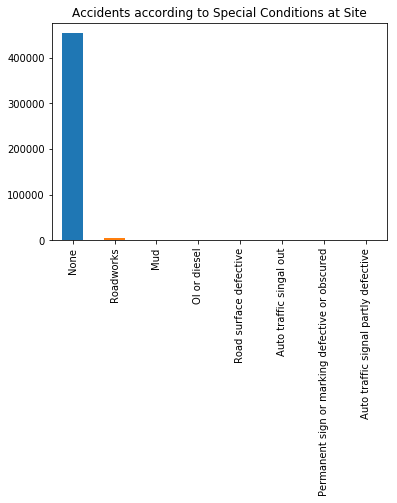

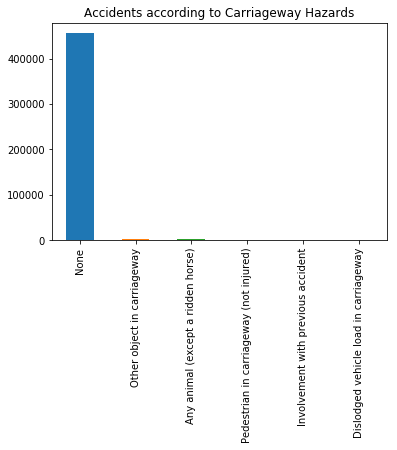

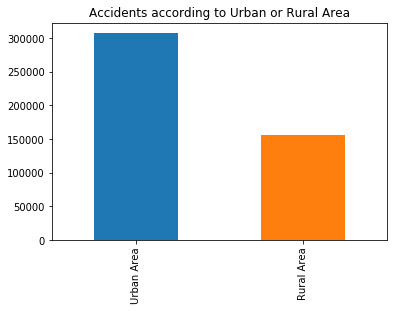

In [20]:

for i, att in enumerate(fatal_accidents):
    if att != 'Speed_limit':
        plt.figure(i)
        fatal_accidents[att].value_counts().plot(kind='bar', title="Accidents according to "+" ".join(att.split('_')))
        plt.savefig('figures_task3/plot_%s.png'%att, bbox_inches='tight')


Less than 30     313344
More than 50      95814
From 40 to 50     54769
Name: Speed_limit, dtype: int64


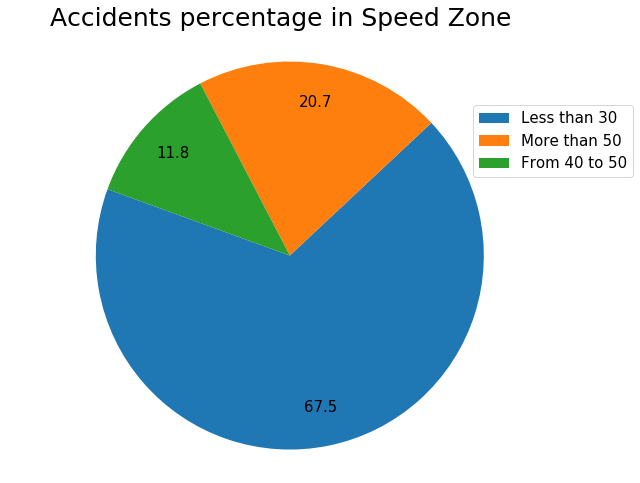

In [22]:
speed = fatal_accidents.Speed_limit.value_counts()
print (speed)
explode = (0.0, 0.0, 0.0) 
plt.figure(figsize=(10, 8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f', pctdistance=0.8, labeldistance=1.9, explode=explode, shadow=False, startangle=160,textprops={'fontsize': 15})

plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5, .9, 'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.savefig('figures_task3/plot_Speed_limit.png', bbox_inches='tight')

In [ ]:
fatal_accidents.to_csv('output_data/preprocessed_fatal_accidents_task3.csv', index=False, sep=',')